In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


df=pd.read_csv('placement.csv')
df 


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [2]:
# data preprocessing
df=df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


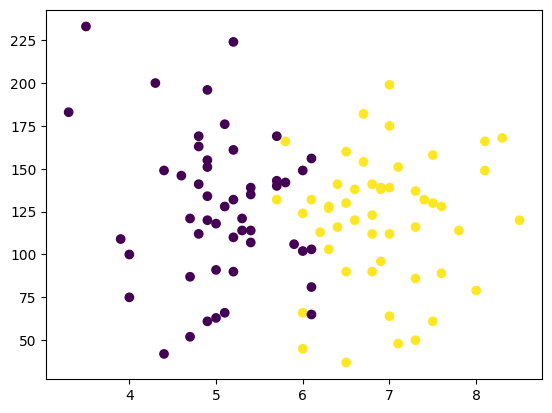

In [6]:
#EDA portoin 
import matplotlib.pyplot as plt 
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.savefig('edafig')

In [7]:
# seperating the dependent and independent variables 

x=df.iloc[:,0:-1]

y=df.iloc[:,-1]



In [8]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [9]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test ,y_train ,y_test=train_test_split(x,y,test_size=0.1)



In [12]:
x_train

,cgpa,iq
76,4.9,155.0
55,7.8,114.0
20,6.6,120.0
90,7.3,86.0
33,6.0,149.0
...,...,...
18,4.0,100.0
40,4.9,134.0
71,6.1,132.0
87,5.7,132.0


In [21]:
x_test

,cgpa,iq
70,6.3,127.0
51,4.8,141.0
48,6.6,138.0
64,7.0,64.0
55,7.8,114.0
71,6.1,132.0
4,5.8,142.0
43,6.8,141.0
33,6.0,149.0
73,4.9,61.0


In [29]:
y_test

70    1
51    0
48    1
64    1
55    1
71    1
4     0
43    1
33    0
73    0
Name: placement, dtype: int64

In [30]:
y_train

39    0
61    1
62    0
50    0
40    0
     ..
82    1
34    0
46    0
47    0
77    1
Name: placement, Length: 90, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train=scaler.fit_transform(x_train)
x_train

array([[-1.17691764,  0.54459376],
       [ 1.14821233,  0.32303628],
       [ 0.02870531, -0.53857615],
       [-2.12419282,  2.68631607],
       [-0.91856987,  0.24918378],
       [ 0.88986456, -0.29240117],
       [-0.48799024, -0.24316617],
       [-0.83245394, -0.80936862],
       [ 0.80374863, -0.68628114],
       [-0.05741062, -0.44010616],
       [ 0.28705308, -0.51395865],
       [-1.77972912, -0.36625366],
       [-0.66022209, -0.34163617],
       [ 0.02870531,  0.00300881],
       [ 0.28705308,  0.1014788 ],
       [-0.74633802, -1.42480607],
       [-0.74633802,  0.1014788 ],
       [-0.48799024, -0.41548866],
       [ 1.83713973,  0.61844625],
       [ 0.11482123, -1.0555436 ],
       [ 1.75102381, -1.1047786 ],
       [-1.69361319, -1.20324859],
       [ 1.32044418, -1.54789356],
       [-0.22964247,  1.11079621],
       [ 1.14821233, -0.19393118],
       [-0.22964247,  0.19994879],
       [ 0.88986456,  0.37227127],
       [ 0.80374863,  0.34765378],
       [-0.48799024,

In [25]:
x_test=scaler.fit_transform(x_test)
x_test

array([[ 0.10331187,  0.19929001],
       [-1.61855267,  0.65667692],
       [ 0.44768478,  0.55866544],
       [ 0.90684866, -1.8589511 ],
       [ 1.82517641, -0.22542641],
       [-0.12627007,  0.36264248],
       [-0.47064297,  0.68934742],
       [ 0.67726672,  0.65667692],
       [-0.24106104,  0.91804087],
       [-1.5037617 , -1.95696258]])

In [28]:
#Model Training

from sklearn.linear_model import LogisticRegression 

clf=LogisticRegression()

clf.fit(x_train,y_train)    

LogisticRegression()

In [33]:
# Model Prediction 

y_pred = clf.predict(x_test)

In [32]:
y_test

70    1
51    0
48    1
64    1
55    1
71    1
4     0
43    1
33    0
73    0
Name: placement, dtype: int64

In [34]:
# Model Accuracy Testing
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

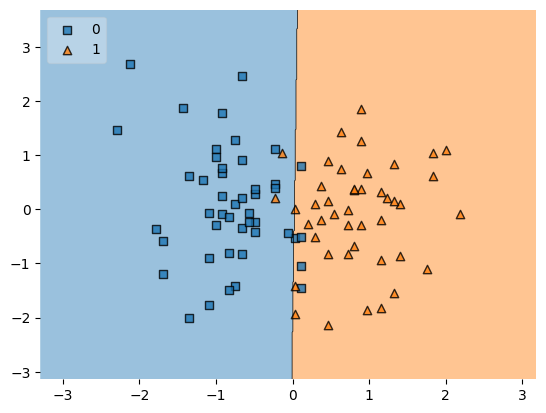

In [37]:
# To display the pattern noticed by this model
# Decision Boundary
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(x_train,y_train.values, clf=clf, legend=2)
plt.savefig('decision_boundary')